(c_new_vectors)=

----------------

```{admonition} Learning Objectives
* Create new spatial objects (points, lines, polygons)
* Assign the correct projection or CRS
* Create points from a table or csv of latitude and longitude 
```
```{admonition} Review
* [CRS what is it?](d_crs_what_is_it.md)
* [Understand CRS codes](d_understand_crs_codes.md)
* [Vector data structures](c_vectors.md)
* [Find Latitude Longitude of your own points, lines, polygons](https://geojson.io/)
```
----------------

 # Manipulating Spatial Objects: Points, Lines, Polygons in Python

Creating and understanding spatial data is often a vital component in the field of geospatial data analysis. This lesson introduces you to the process of generating new spatial data from scratch, as well as enhancing your understanding of the structure and manipulation of spatial data in Python. 

The following code examples are particularly useful for:

1. Converting a text file or other data that contain coordinates into a Shapefile, a popular geospatial vector data format.
2. Creating and manipulating various spatial objects, including points, lines, and polygons, which form the foundation of geospatial analysis.

Let's begin by importing the necessary modules:

In [1]:
# Import necessary modules first
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import fiona
import matplotlib.pyplot as plt
plt.style.use('bmh') # better for plotting geometries vs general plots.

## Creating GeoDataFrame Geometries

A `GeoDataFrame` object is a `pandas.DataFrame` that has a geometry column, storing spatial data like points, lines, and polygons. Let's create an empty `GeoDataFrame` and a new column named 'geometry' that will hold our Shapely geometric objects:

In [2]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


A fully functioning `GeoDataFrame` requires a few key components:

- `data`: A pandas DataFrame, a dictionary, or an empty list containing the desired attribute data.
- `crs`:  The Coordinate Reference System (CRS) of the geometry objects. This can be any format accepted by `pyproj.CRS.from_user_input()`.
- `geometry`:  A column name in a DataFrame used as geometry or a Shapely geometric object (point, line, or polygon). 

Since Geopandas can work with Shapely geometric objects, we can create a Shapefile from scratch by passing these objects into the `GeoDataFrame`. This is a particularly useful feature as it allows for an easy conversion of a text file containing coordinates into a Shapefile.

### Create Points from List of Coordinates

Creating Geopandas point objects from coordinates is straightforward. We generate a Shapely point geometry object from a coordinate pair, create a dictionary that contains this geometry and any attributes we need, and define a Coordinate Reference System (CRS). Here, we use an [EPSG code](d_understand_crs_codes.md) as our CRS.   

You can find a more detailed explanation of this process [here](e_points_the_long_way).

<Axes: >

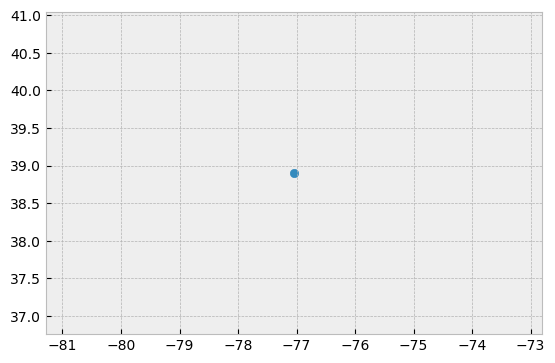

In [3]:
# Coordinates of the GW department of geography in Decimal Degrees
coordinate = [-77.04639494419096,  38.89934963421794]

# Create a Shapely point from a coordinate pair
point_coord = Point(coordinate)

# create a dataframe with needed attributes and required geometry column
df = {'GWU': ['Dept Geography'], 'geometry': [point_coord]}

# Convert shapely object to a geodataframe 
point = gpd.GeoDataFrame(df, geometry='geometry', crs ="EPSG:4326")

# Let's see what we have
point.plot()

We can similarly process a set of points stored in a pandas dataframe.

<Axes: >

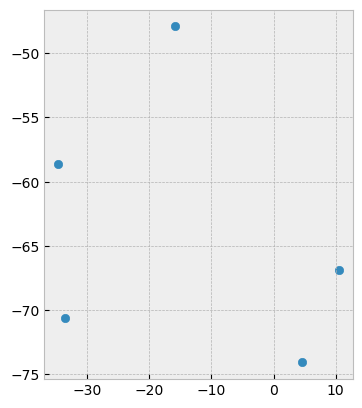

In [4]:
# list of attributes and coordinates
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'lat': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'lon': [-58.66, -47.91, -70.66, -74.08, -66.86]})

# Create a Shapely points from the coordinate-tuple list
ply_coord = [Point(x, y) for x, y in zip(df.lat, df.lon)]

# Convert shapely object to a geodataframe with a crs
poly = gpd.GeoDataFrame(df, geometry=ply_coord, crs ="EPSG:4326")

# Let's see what we have
poly.plot()

The examples provided here demonstrate the creation of spatial points from coordinate data. This kind of spatial data generation is crucial in various fields like urban planning, environmental studies, transportation and logistics, where location-specific data is often pivotal.

[Adapted from Geopandas](https://geopandas.org/gallery/create_geopandas_from_pandas.html)


### Creating Points from CSV of latitude and longitude (lat, lon)

A frequent requirement in spatial data analysis is creating geometric data from a CSV file, especially when dealing with large datasets or when the data is exported from a different system. Here, we create a CSV file that lists the corners of a rectangle outlining Washington DC, then read the file into a GeoDataFrame and convert the longitude and latitude data into spatial points.

In [5]:
import pandas as pd
# create an outline of Washington DC and write to CSV
path_to_csv = r'../temp/points.csv'
points = {'Corner':['N','E','S','W'],
          'lon': [-77.0412826538086, -77.11681365966797, -77.01896667480469, -77.0412826538086], 
          'lat': [38.99570671505043, 38.936713143230044, 38.807610542357594, 38.99570671505043]}
points = pd.DataFrame.from_dict(points)
points.to_csv(path_to_csv)              

We can then read the CSV file, convert the lat/lon values into a list of Shapely Point objects using `gpd.points_from_xy()``, and create a GeoDataFrame.

In [6]:
# read the point data in 
df = pd.read_csv(path_to_csv)

# Create a geodataframe from the data using and 'EPSG' code to assign WGS84 coordinate reference system
points= gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.lon, y=df.lat), crs = 'EPSG:4326')
points

,Unnamed: 0,Corner,lon,lat,geometry
0,0,N,-77.041283,38.995707,POINT (-77.04128 38.99571)
1,1,E,-77.116814,38.936713,POINT (-77.11681 38.93671)
2,2,S,-77.018967,38.807611,POINT (-77.01897 38.80761)
3,3,W,-77.041283,38.995707,POINT (-77.04128 38.99571)


In this case `points_from_xy()` was used to transform lat and lon into a list of `shapely.Point` objects. This then is used as the geometry for the GeoDataFrame. (`points_from_xy()` is simply an enhanced wrapper for `[Point(x, y) for x, y in zip(df.lon, df.lat)]`)

This is a powerful approach to efficiently convert geographical coordinates stored in CSV format into a spatial format that Python libraries can operate on.

```{tip}  
- Although we say "lat lon" python uses "lon lat" instead, this follows the preference for using x,y for notation. 
- Typically, like the data above, these data are stored in WGS84 lat lon, but be sure to check this, another common format is UTM coordinates (look for values around 500,000 east to west and measured in meters)
```

### Creating Spatial lines

Creating lines from points often represents trajectories or paths in spatial data. For example, this could represent the movement of people, animals, or vehicles. In this case, we represent three bike riders' paths, where each rider's unique `ID`, their `X,Y` locations, and their `Speed` are tracked.

In [7]:
from io import StringIO 
data = """
ID,X,Y,Speed
1,  -87.789,  41.976,  16
1,  -87.482,  41.677,  17
2,  -87.739,  41.876,  16
2,  -87.681,  41.798,  16
2,  -87.599,  41.708,  16
3,  -87.599,  41.908,  17
3,  -87.598,  41.708,  17
3,  -87.643,  41.675,  17
"""
# use StringIO to read in text chunk
df = pd.read_table(StringIO(data), sep=',')

First, we convert these data to points, but we notice that points cannot accurately represent the trajectories as they ignore the connection between subsequent locations of each rider.

<Axes: >

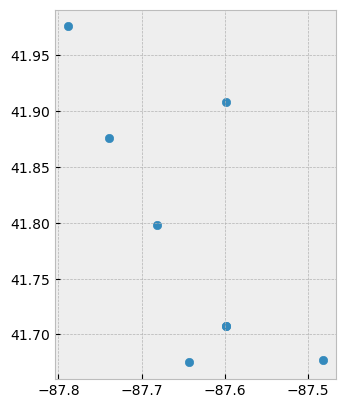

In [8]:
#zip the coordinates into a point object and convert to a GeoData Frame
points = [Point(xy) for xy in zip(df.X, df.Y)]
geo_df = gpd.GeoDataFrame(df, geometry=points, crs = 'EPSG:4326')
geo_df.plot()

While the plot above provides the individual points for each rider, it fails to show the movement paths. Therefore, we should treat these data as lines to clearly illustrate each rider's path.

To achieve this, we will group  using `.groupby()` the data by the `ID` of each rider and convert the points to `LineString` objects. So here we `.groupby(['ID'])`, for each `ID` group we convert the values to a list, and store it in a Fiona `LineString` object.

<Axes: >

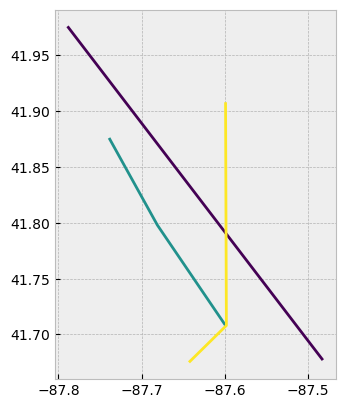

In [9]:
# treat each `ID` group of points as a line
lines = geo_df.groupby(['ID'])['geometry'].apply(lambda x:  LineString(x.tolist()))

# store as a GeodataFrame and add 'ID' as a column (currently stored as the 'index')
lines = gpd.GeoDataFrame(lines, geometry='geometry', crs="EPSG:4326") 
lines.reset_index(inplace=True)
lines.plot(column='ID')

As a result, we see that each rider's path is treated separately and illustrated by a distinct line. Now we can see that each line is treated separately by `ID`, and plot them using `.plot(column='ID')`.

The conversion of points into lines is a common operation in spatial data analysis, especially when dealing with movement data. This approach enables us to track the trajectory of moving entities, visualize their paths, and analyze factors such as distance, speed, and time.


### Constructing Spatial Polygons

The process of constructing a polygon in Geopandas bears resemblance to the methods we used earlier for points and lines. The steps are straightforward: we start by creating a Shapely geometry object from our coordinates, integrate this object into a DataFrame with any relevant attributes, and then generate a `GeoDataFrame` while specifying the appropriate Coordinate Reference System (CRS).

```python
# Define a list of coordinate pairs
coordinates = [[-77.0412826538086, 38.99570671505043], 
               [-77.11681365966797, 38.936713143230044], 
               [-77.01896667480469, 38.807610542357594],
               [-76.90910339355469, 38.892636142310295]]           

# Construct a Shapely polygon using the list of coordinates
ply_coord = Polygon(coordinates)

# Create a dictionary to hold the necessary attributes and geometry column
df = {'Attribute': ['name1'], 'geometry': [ply_coord]}

# Convert the Shapely object into a Geodataframe and assign a CRS
poly = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

# Visualize the created polygon
poly.plot()
```

The above code results in a single polygon, representing an area enclosed by the defined coordinates. This polygon can symbolize any area-based feature such as a city boundary, a lake, a park, etc. Being able to create polygons is crucial in geographic data analysis as they represent the spatial extents of features and enable operations such as area calculation and spatial join.

(e_points_the_long_way)=



### Constructing Spatial Points: A Detailed Walkthrough

Due to Geopandas' integration with Shapely geometric objects, it's feasible to create a shapefile from scratch by feeding Shapely's geometric objects into a GeoDataFrame. This capability is particularly valuable as it provides a straightforward pathway to transform, for instance, a text file containing coordinates into a shapefile.

Let's start by creating an empty `GeoDataFrame` and adding a new column titled 'geometry' which will hold our Shapely objects:

```python
# Instantiate an empty Geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Add a new column 'geometry' to the GeoDataFrame
newdata['geometry'] = None

print(newdata)
```

Next, let's create a Shapely Point that represents the GWU Department of Geography, which we can later insert into our GeoDataFrame:

```python
# Specify the coordinates for the GWU Department of Geography in Decimal Degrees
coordinates = (-77.04639494419096,  38.89934963421794)

# Create a Shapely point using the coordinates
point = Point(coordinates)

# Display the created point
print(point)
```

At this point, we have a suitable `Point` object. 

We can now incorporate this point into the 'geometry' column of our GeoDataFrame:

```python
# Insert the point into the 'geometry' column at index 0
newdata.loc[0, 'geometry'] = point

# Display the updated GeoDataFrame
print(newdata)
```

Now, our GeoDataFrame contains a `Point` that can be exported to a Shapefile.

Let's further enrich our GeoDataFrame by introducing another column named 'Location' with the text 'GWU Geography':

```python
# Insert data into a new column 'Location'
newdata.loc[0, 'Location'] = 'GWU Geography'

# Display the updated GeoDataFrame
print(newdata)
```

Now, our GeoDataFrame has supplementary information which aids in identifying the represented feature.

Prior to exporting the data, it's advantageous to designate the Coordinate Reference System (CRS, 'projection') for the GeoDataFrame.

A GeoDataFrame has an attribute called `.crs` that indicates the data's coordinate system, which is currently empty (None) in our case since we are generating the data from scratch (i.e., `newdata.crs` returns `None`). ([More on crs codes here](d_understand_crs_codes.md))

We will assign a CRS to our GeoDataFrame. Fiona, a Python module, has a convenient function called `from_epsg()` that assigns a coordinate system to the GeoDataFrame. We will use this function to set the projection to WGS84 (epsg code: 4326), the most widely used CRS for lat lon systems:

```python
# Assign the GeoDataFrame's CRS to WGS84
newdata.crs = "EPSG:4326"

# Display the GeoDataFrame's CRS
print(newdata.crs)
```

Lastly, we can export the data using GeoDataFrame's `.to_file()` function. This function operates similarly to those in numpy or pandas, with the sole requirement of providing the output path for the Shapefile:

```python
# Specify the output path for the Shapefile
outfp = r"../temp/gwu_geog.shp"

# Export the data to the specified Shapefile
newdata.to_file(outfp)
```

```tip}
Given the close integration between Geopandas and Pandas, it's beneficial to delve into the [Pandas User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) for a comprehensive understanding.
```

-------------------

Adapted from [Intro to Python GIS](https://automating-gis-processes.github.io/CSC18/lessons/L2/geopandas-basics.html#creating-geometries-into-a-geodataframe)